In [1]:
import pandas as pd
import numpy as np

df_denof = pd.read_csv('../train_public/1h/L03.B02_1H.csv')
df_weather = pd.read_csv('D:/payday/train_public/weather/L03_weather_train.csv')

In [2]:
print(df_weather.columns)
print(df_denof.columns)

Index(['timestamp', 'air_temperature_at_2m(deg_C)',
       'relative_humidity_at_2m(%)', 'direct_solar_radiation(W/m^2)',
       'diffuse_solar_radiation(W/m^2)', 'wind_speed_at_10m(km/h)',
       'wind_direction_at_10m(deg)'],
      dtype='object')
Index(['timestamp', 'main_meter(kW)'], dtype='object')


In [3]:
print(df_weather.dtypes)
print(df_denof.dtypes)

timestamp                          object
air_temperature_at_2m(deg_C)      float64
relative_humidity_at_2m(%)        float64
direct_solar_radiation(W/m^2)     float64
diffuse_solar_radiation(W/m^2)    float64
wind_speed_at_10m(km/h)           float64
wind_direction_at_10m(deg)        float64
dtype: object
timestamp          object
main_meter(kW)    float64
dtype: object


In [4]:
df = pd.merge(df_denof,df_weather, on= 'timestamp',how = 'left')

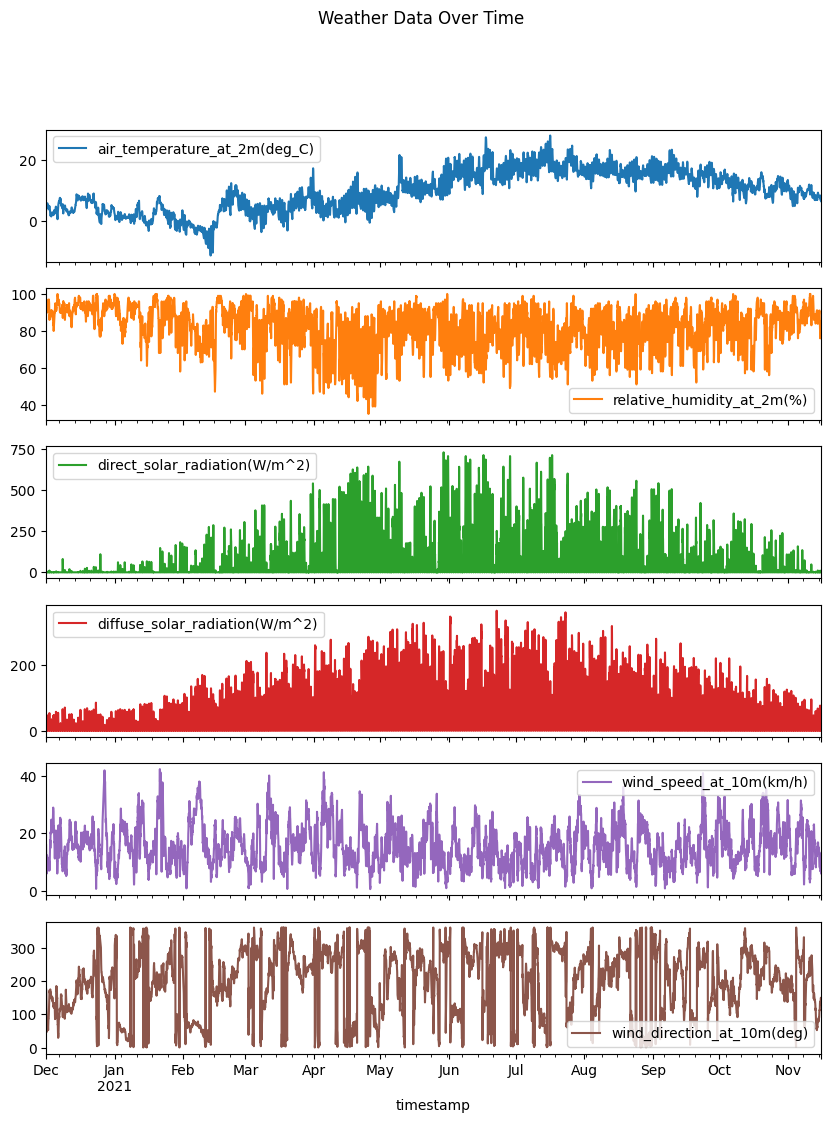

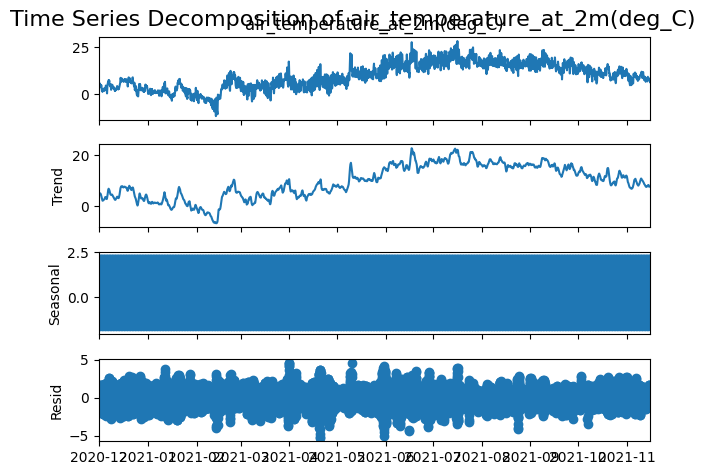

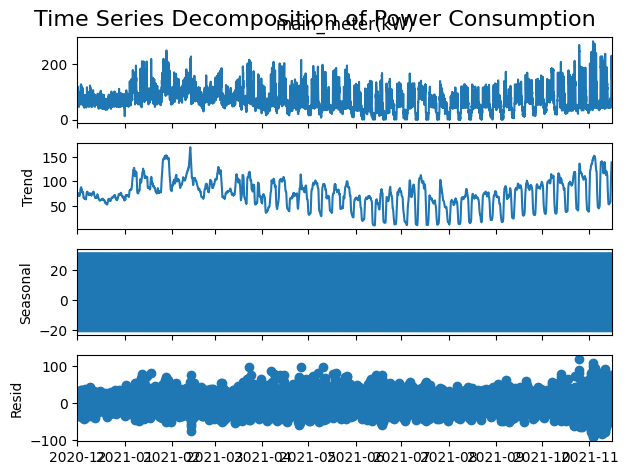

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert timestamp to datetime
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])
df_denof['timestamp'] = pd.to_datetime(df_denof['timestamp'])

# Set timestamp as index
df_weather.set_index('timestamp', inplace=True)
df_denof.set_index('timestamp', inplace=True)

# Handle missing values by filling with zeros
df_weather.fillna(0, inplace=True)
df_denof.fillna(0, inplace=True)

# Plot weather variables over time
df_weather.plot(subplots=True, figsize=(10, 12), title='Weather Data Over Time')
plt.show()

# Decompose time series for weather data

result = seasonal_decompose(df_weather['air_temperature_at_2m(deg_C)'], model='additive', period=24)
result.plot()
plt.suptitle(f'Time Series Decomposition of air_temperature_at_2m(deg_C)', fontsize=16)
plt.show()

# Decompose time series for power consumption data
result_power = seasonal_decompose(df_denof['main_meter(kW)'], model='additive', period=24)
result_power.plot()
plt.suptitle('Time Series Decomposition of Power Consumption', fontsize=16)
plt.show()


In [6]:
df.rename(columns={'main_meter(kW)':'power'},inplace=True)

In [7]:
df = df.reset_index()

In [8]:
df.rename(columns = {'air_temperature_at_2m(deg_C)': 'temperature'})

,index,timestamp,power,temperature,relative_humidity_at_2m(%),direct_solar_radiation(W/m^2),diffuse_solar_radiation(W/m^2),wind_speed_at_10m(km/h),wind_direction_at_10m(deg)
0,0,2020-12-01 00:00:00+00:00,69.778595,3.444376,97.016089,0.026658,-0.054859,15.924282,175.974536
1,1,2020-12-01 01:00:00+00:00,52.449440,3.662187,96.964139,-0.022419,0.039787,13.008325,174.044967
2,2,2020-12-01 02:00:00+00:00,72.574860,3.849796,97.042752,0.018184,-0.019089,9.631573,167.017767
3,3,2020-12-01 03:00:00+00:00,67.813957,4.047407,97.044695,0.054901,-0.016765,6.825520,148.045236
4,4,2020-12-01 04:00:00+00:00,65.743805,4.184971,97.035953,-0.022905,-0.012460,6.036958,114.996164
...,...,...,...,...,...,...,...,...,...
8395,8395,2021-11-15 19:00:00+00:00,148.864655,6.910766,81.985465,-0.036131,0.038543,6.930305,137.044424
8396,8396,2021-11-15 20:00:00+00:00,151.322693,6.753975,81.976869,0.015393,0.038366,7.456723,144.981432
8397,8397,2021-11-15 21:00:00+00:00,120.674629,6.582176,82.985219,0.014573,0.001191,7.893027,149.998625
8398,8398,2021-11-15 22:00:00+00:00,113.046677,6.631711,83.958208,-0.020878,-0.013877,6.360064,142.022950


In [10]:
df.columns

Index(['index', 'power', 'air_temperature_at_2m(deg_C)',
       'relative_humidity_at_2m(%)', 'direct_solar_radiation(W/m^2)',
       'diffuse_solar_radiation(W/m^2)', 'wind_speed_at_10m(km/h)',
       'wind_direction_at_10m(deg)', 'detrended_power'],
      dtype='object')

In [12]:
df.rename(columns = {'index':'timestamp'},inplace = True)

This temperature data provides valuable information that can help isolate the heating component of the power consumption. Here's what we can do with this additional information:

1. Correlation analysis:
   - Calculate the correlation between temperature and power consumption. A strong negative correlation would indicate that as temperature decreases, power consumption increases, likely due to heating.

2. Heating degree days (HDD):
   - Calculate HDDs using a base temperature (typically 18°C or 65°F). This gives a measure of how much heating is needed.
   - Compare HDDs with power consumption to see the relationship.

3. Threshold identification:
   - Identify the temperature threshold below which heating is likely to be used in the building.
   - Analyze power consumption patterns when temperature is below this threshold.

4. Seasonal comparison:
   - Compare power consumption during colder months (lower temperatures) with warmer months to estimate the additional load due to heating.

5. Regression analysis:
   - Perform a regression analysis with temperature as the independent variable and power consumption as the dependent variable.
   - The slope of this relationship during colder temperatures can indicate the heating load.

6. Time-lagged analysis:
   - Consider time lags between temperature changes and power consumption changes, as buildings may take time to respond to external temperature fluctuations.

7. Weekday vs. weekend analysis:
   - Separate the data into weekdays and weekends to account for occupancy differences.
   - Analyze how temperature affects power consumption differently on occupied vs. unoccupied days.

8. Baseload identification:
   - Use the warmest periods to estimate the baseload (non-heating power consumption).
   - Subtract this baseload from total consumption during colder periods to estimate heating load.

9. Change point analysis:
   - Identify the temperature at which power consumption starts to increase significantly, indicating the onset of heating usage.

10. Machine learning models:
    - Develop models (e.g., random forests, neural networks) that can predict power consumption based on temperature and other relevant factors.
    - Use feature importance to understand the impact of temperature on consumption.

By combining these approaches with the time series decomposition you've already performed, you should be able to more accurately estimate the heating component of the total power consumption. The key is to look for patterns where power consumption increases as temperature decreases, especially during typically occupied hours of the building.